데이터 미리보기:
             날짜      종가      시가      고가      저가     거래량    변동 %
0  2025- 04- 01  5.0625  5.0510  5.0695  5.0503   0.01K   0.25%
1  2025- 03- 31  5.0500  5.1450  5.1635  5.0175   0.00K  -1.99%
2  2025- 03- 28  5.1525  5.1185  5.1860  5.0930   0.31K   0.64%
3  2025- 03- 27  5.1195  5.2405  5.2715  5.0890  65.70K  -2.36%
4  2025- 03- 26  5.2430  5.2275  5.3740  5.2220  88.50K   0.62%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

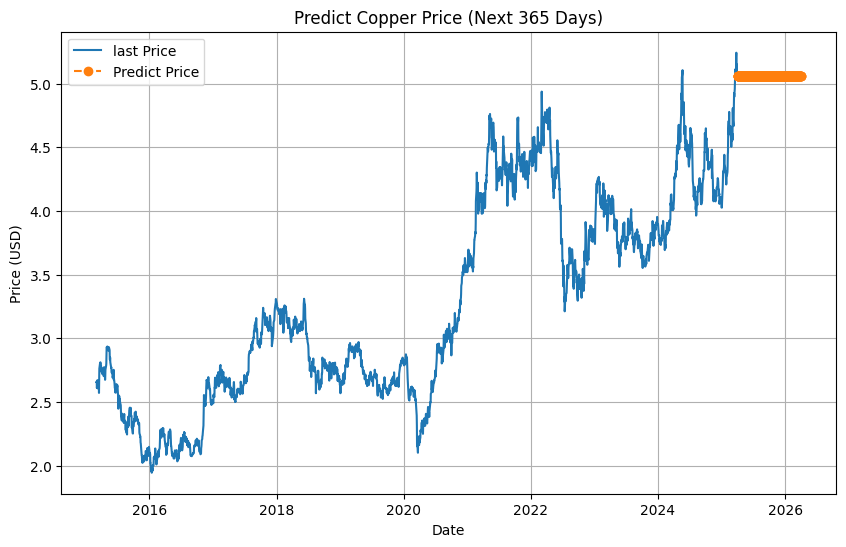

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. CSV 파일에서 데이터 로드 (파일명: "구리 선물 과거 데이터.csv")
file_path = "/content/구리 선물 과거 데이터.csv"
data = pd.read_csv(file_path)

# 2. 데이터 확인 및 전처리
# CSV 파일의 컬럼명이 '날짜'와 '종가'임을 유의
print("데이터 미리보기:")
print(data.head())

# 날짜 컬럼을 datetime 형식으로 변환하고, 인덱스로 설정
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)
data.sort_index(inplace=True)

# 3. 데이터 시각화: 2025년 3월 한달치 구리 가격
# plt.figure(figsize=(10, 6))
# plt.plot(data['종가'], marker='o', linestyle='-')
# plt.title("2025year March Copper Price")
# plt.xlabel("Date")
# plt.ylabel("price (USD)")
# plt.grid(True)
# plt.show()

# 4. ARIMA 모델을 이용한 시계열 예측
# 참고: ARIMA 모델의 (p, d, q) 파라미터는 데이터 특성에 따라 달라질 수 있습니다.
# 여기서는 예시로 ARIMA(1,1,1)을 사용합니다.
model = sm.tsa.ARIMA(data['종가'], order=(1, 1, 1))
model_fit = model.fit()

# 5. 미래 가격 예측: 다음 365일을 예측합니다.
forecast_steps = 365
forecast = model_fit.forecast(steps=forecast_steps)

# print("다음 7일간의 구리 가격 예측:")
# print(forecast)

# 6. 예측 결과 시각화
# 예측 기간의 날짜 생성
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

plt.figure(figsize=(10, 6))
plt.plot(data['종가'], label="last Price")
plt.plot(forecast_dates, forecast, label="Predict Price", marker='o', linestyle='--')
plt.title("Predict Copper Price (Next 365 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()